In [2]:
def runge_kutta_4th_order(f, x0, y0, h, n):
    """
    4th Order Runge-Kutta method to solve ODE.
    
    f : function
        The function to be integrated: dy/dx = f(x, y)
    x0 : float
        Initial value of x
    y0 : float
        Initial value of y
    h : float
        Step size
    n : int
        Number of steps
    
    Returns:
    --------
    list, list
        x and y values after n steps
    """
    x = x0
    y = y0
    x_values = [x0]
    y_values = [y0]
    
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(x + h, y + k3)

        y += (k1 + 2*k2 + 2*k3 + k4) / 6.0
        x += h
        x_values.append(x)
        y_values.append(y)
        
    return x_values, y_values

# Example usage:
def example_function(x, y):
    return y - x**2 + 1

x0, y0, h, n = 0, 0.5, 0.2, 20
x_values, y_values = runge_kutta_4th_order(example_function, x0, y0, h, n)

for x, y in zip(x_values, y_values):
    print(f"x: {x:.2f}, y: {y:.2f}")

x: 0.00, y: 0.50
x: 0.20, y: 0.83
x: 0.40, y: 1.21
x: 0.60, y: 1.65
x: 0.80, y: 2.13
x: 1.00, y: 2.64
x: 1.20, y: 3.18
x: 1.40, y: 3.73
x: 1.60, y: 4.28
x: 1.80, y: 4.82
x: 2.00, y: 5.31
x: 2.20, y: 5.73
x: 2.40, y: 6.05
x: 2.60, y: 6.23
x: 2.80, y: 6.22
x: 3.00, y: 5.96
x: 3.20, y: 5.37
x: 3.40, y: 4.38
x: 3.60, y: 2.86
x: 3.80, y: 0.69
x: 4.00, y: -2.30


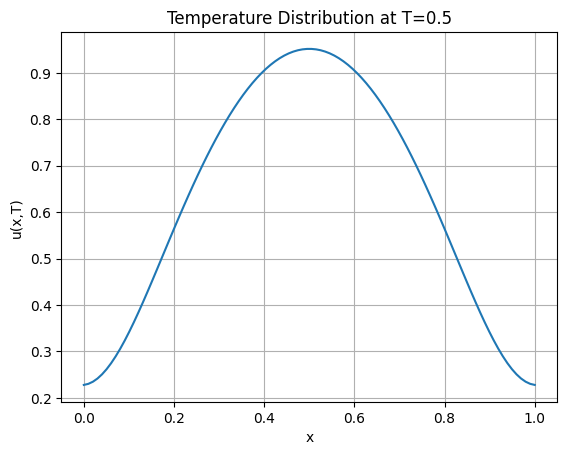

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_4th_order(f, u, h, dx, alpha):
    k1 = h * f(u, dx, alpha)
    k2 = h * f(u + 0.5 * k1, dx, alpha)
    k3 = h * f(u + 0.5 * k2, dx, alpha)
    k4 = h * f(u + k3, dx, alpha)
    
    return u + (k1 + 2*k2 + 2*k3 + k4) / 6.0

def heat_equation(u, dx, alpha):
    d2u_dx2 = (np.roll(u,-1) - 2*u + np.roll(u,1)) / dx**2
    return alpha * d2u_dx2

# Parameters
L = 1.0  # Length of the rod
T = 0.5  # Total time
Nx = 100  # Number of spatial points
Nt = 200  # Number of time steps
alpha = 0.01  # Thermal diffusivity
dx = L / (Nx - 1)
dt = T / Nt

# Initial condition (e.g., u(x,0) = sin(pi*x))
x = np.linspace(0, L, Nx)
u = np.sin(np.pi * x)

# Time evolution
for _ in range(Nt):
    u = runge_kutta_4th_order(heat_equation, u, dt, dx, alpha)

# Visualization
plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u(x,T)')
plt.title('Temperature Distribution at T=0.5')
plt.grid(True)
plt.show()
